# BibRec: Training Random Forest Model

### RF Features: Country, State, Age, Year-of-Publication, Publisher

In [1]:
from bibrec.server.Utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

books, users, ratings = get_normalized_data(books_path='data/BX-Books.csv',
                                            users_path='data/BX-Users.csv',
                                            ratings_path='data/BX-Book-Ratings.csv')

/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", encoding="latin-1")
/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:94: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [2]:
users

,user_id,age,city,state,country,user_mean,user_count
0,1,47.586614,nyc,new_york,usa,0.0,0.0
1,2,18.000000,stockton,california,usa,0.0,0.0
2,3,27.753817,moscow,other,other,0.0,0.0
3,4,17.000000,porto,other,portugal,0.0,0.0
4,5,25.153473,farnborough,other,united_kingdom,0.0,0.0
...,...,...,...,...,...,...,...
278853,278854,30.075178,portland,oregon,usa,7.0,6.0
278854,278855,50.000000,tacoma,washington,united_kingdom,0.0,0.0
278855,278856,40.472504,brampton,ontario,canada,0.0,0.0
278856,278857,36.211564,knoxville,other,usa,0.0,0.0


In [3]:
books = books.drop(["isbn"], axis=1)
books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,3
1,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,4
2,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,14
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,6
4,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,1
270942,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,9


In [4]:
ratings = ratings.drop(["isbn"], axis=1)
ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780155061224,0.0,276726,5
1,9780521656153,-1.5,276729,3
2,9780521795029,1.5,276729,6
3,9780385501200,0.0,276744,7
4,9780385501200,0.0,11676,10
...,...,...,...,...
9444717,9780515107661,0.0,242006,10
9444718,9780515107661,0.0,249628,10
9444719,9780515107661,0.0,276709,10
9444720,9780590442442,0.0,197659,8


In [5]:
# limit data to top-rated books only
top_ratings = ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
top_ratings = top_ratings[:100]
top_ratings = top_ratings.reset_index()
# user_id => nr of ratings
top_ratings = top_ratings.drop('user_id', axis=1)
top_ratings

,isbn13
0,9780316666343
1,9780971880108
2,9780385504201
3,9780312195519
4,9780060928339
...,...
95,978074323719
96,9780439064866
97,978044660899
98,978038550582


In [6]:
top_ratings = top_ratings.merge(ratings, on='isbn13', how='inner')
top_ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780316666343,1.000000,277439,7
1,9780316666343,1.000000,277752,7
2,9780316666343,1.000000,278633,9
3,9780316666343,1.000000,638,10
4,9780316666343,1.000000,709,3
...,...,...,...,...
4391748,9780553572995,-1.891304,274004,9
4391749,9780553572995,-1.891304,274692,7
4391750,9780553572995,-1.891304,275519,8
4391751,9780553572995,-1.891304,276203,10


In [7]:
filtered_books = books[books.isbn13.isin(top_ratings.isbn13)]
filtered_books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
18,The Testament,John Grisham,1999,other,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,9780440234746,7.694118,170.0,6
26,Wild Animus,Rich Shapero,2004,other,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,9780971880108,4.390706,581.0,1
28,Timeline,MICHAEL CRICHTON,2000,ballantine_books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,9780345417626,7.851282,195.0,5
37,To Kill a Mockingbird,Harper Lee,1988,other,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,9780446310789,8.943925,214.0,17
52,The Street Lawyer,JOHN GRISHAM,1999,other,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,9780440225706,7.624060,133.0,6
...,...,...,...,...,...,...,...,...,...,...,...
5545,The Chamber,John Grisham,1995,other,http://images.amazon.com/images/P/0440220602.0...,http://images.amazon.com/images/P/0440220602.0...,http://images.amazon.com/images/P/0440220602.0...,9780440220602,7.431507,146.0,10
5607,A Walk to Remember,Nicholas Sparks,2000,warner_books,http://images.amazon.com/images/P/0446608955.0...,http://images.amazon.com/images/P/0446608955.0...,http://images.amazon.com/images/P/0446608955.0...,978044660899,7.854839,124.0,5
5662,The Summons,John Grisham,2002,other,http://images.amazon.com/images/P/0440241073.0...,http://images.amazon.com/images/P/0440241073.0...,http://images.amazon.com/images/P/0440241073.0...,9780440241072,7.285000,200.0,3
6329,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,9780439136365,9.082707,133.0,4


In [8]:
filtered_users = users[users.user_id.isin(top_ratings.user_id)]
filtered_users

,user_id,age,city,state,country,user_mean,user_count
25,26,44.202006,bellevue,washington,usa,9.500000,2.0
50,51,34.000000,renton,washington,usa,9.000000,1.0
90,91,30.420151,toronto/newmarket,,other,9.000000,1.0
113,114,57.000000,ligonier,pennsylvania,usa,8.125000,8.0
164,165,62.000000,olympia,washington,usa,6.000000,3.0
...,...,...,...,...,...,...,...
278652,278653,51.000000,juniata,other,usa,6.000000,1.0
278697,278698,39.554048,pasadena,other,other,10.000000,1.0
278754,278755,18.000000,herkimer,other,other,1.000000,1.0
278797,278798,39.000000,stayton,oregon,usa,7.000000,2.0


In [9]:
encoded_books = hot_encode_books(filtered_books)
encoded_books

,book_title,book_author,year_of_publication,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
18,The Testament,John Grisham,1999,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,9780440234746,7.694118,170.0,6,...,0,0,0,0,0,0,0,0,0,1
26,Wild Animus,Rich Shapero,2004,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,9780971880108,4.390706,581.0,1,...,0,0,0,0,0,0,0,0,0,1
28,Timeline,MICHAEL CRICHTON,2000,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,9780345417626,7.851282,195.0,5,...,0,0,0,0,0,0,0,0,0,0
37,To Kill a Mockingbird,Harper Lee,1988,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,9780446310789,8.943925,214.0,17,...,0,0,0,0,0,0,0,0,0,1
52,The Street Lawyer,JOHN GRISHAM,1999,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,9780440225706,7.624060,133.0,6,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,The Chamber,John Grisham,1995,http://images.amazon.com/images/P/0440220602.0...,http://images.amazon.com/images/P/0440220602.0...,http://images.amazon.com/images/P/0440220602.0...,9780440220602,7.431507,146.0,10,...,0,0,0,0,0,0,0,0,0,1
5607,A Walk to Remember,Nicholas Sparks,2000,http://images.amazon.com/images/P/0446608955.0...,http://images.amazon.com/images/P/0446608955.0...,http://images.amazon.com/images/P/0446608955.0...,978044660899,7.854839,124.0,5,...,0,0,0,0,0,0,0,0,0,0
5662,The Summons,John Grisham,2002,http://images.amazon.com/images/P/0440241073.0...,http://images.amazon.com/images/P/0440241073.0...,http://images.amazon.com/images/P/0440241073.0...,9780440241072,7.285000,200.0,3,...,0,0,0,0,0,0,0,0,0,1
6329,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,9780439136365,9.082707,133.0,4,...,0,0,0,0,0,0,0,0,0,0


In [10]:
encoded_users = hot_encode_users(filtered_users)
encoded_users

,user_id,age,city,user_mean,user_count,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
25,26,44.202006,bellevue,9.500000,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,51,34.000000,renton,9.000000,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,91,30.420151,toronto/newmarket,9.000000,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
113,114,57.000000,ligonier,8.125000,8.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,165,62.000000,olympia,6.000000,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278652,278653,51.000000,juniata,6.000000,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278697,278698,39.554048,pasadena,10.000000,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278754,278755,18.000000,herkimer,1.000000,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278797,278798,39.000000,stayton,7.000000,2.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
18,9780440234746,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26,9780971880108,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28,9780345417626,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,9780446310789,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,9780440225706,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,9780440220602,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5607,978044660899,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5662,9780440241072,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6329,9780439136365,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_users = encoded_users.filter(regex="user_id|age|country_|state_", axis=1)
df_users

,user_id,age,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
25,26,44.202006,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,51,34.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,91,30.420151,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
113,114,57.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,165,62.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278652,278653,51.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278697,278698,39.554048,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278754,278755,18.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278797,278798,39.000000,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
# TODO: normalized_rating doesn't make sense yet
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df_ratings = top_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df_ratings

,isbn13,user_id,book_rating
0,9780316666343,277439,7
1,9780316666343,277752,7
2,9780316666343,278633,9
3,9780316666343,638,10
4,9780316666343,709,3
...,...,...,...
4391748,9780553572995,274004,9
4391749,9780553572995,274692,7
4391750,9780553572995,275519,8
4391751,9780553572995,276203,10


In [14]:
df = df_ratings
df = df.merge(df_books, on="isbn13", how="left")
df = df.merge(df_users, on="user_id", how="left")
df

,isbn13,user_id,book_rating,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780316666343,277439,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9780316666343,277752,7,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9780316666343,278633,9,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780316666343,638,10,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,709,3,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4391748,9780553572995,274004,9,10,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4391749,9780553572995,274692,7,10,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4391750,9780553572995,275519,8,10,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4391751,9780553572995,276203,10,10,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Features
# X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
X = df.drop(['user_id', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']

In [16]:
X

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4391748,9780553572995,10,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4391749,9780553572995,10,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4391750,9780553572995,10,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4391751,9780553572995,10,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
Y

0           7
1           7
2           9
3          10
4           3
           ..
4391748     9
4391749     7
4391750     8
4391751    10
4391752     4
Name: book_rating, Length: 4391753, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [19]:
from os.path import exists
import pickle

# Load the model from the file
model_file = "rf5.pkl"
if exists(model_file):
    print("Loading file:", model_file)
    with open(model_file, "rb") as file:
        rfc = pickle.load(file)
else:
    print("Creating new model:", model_file)
    rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1, verbose=10)

Creating new model


In [20]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    6.5s


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   27.3s


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   41.3s


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100


[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  1.0min


building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.4min


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.8min


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  2.2min


building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100


[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:  2.8min


building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100


[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  3.4min


building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100


[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:  4.0min


building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100


[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:  4.5min


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  4.8min finished


RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1,
                       verbose=10)

In [21]:
import pickle

# Save the model to a file
with open(model_file, "wb") as file:
    pickle.dump(rfc, file)

In [22]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    4.9s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    6.2s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    7.7s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    9.1s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:   11.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   12.7s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   13.8s finished


array([ 7,  8, 10, ...,  9,  8,  8])

In [23]:
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.92      0.84      0.88     16036
           2       0.83      0.80      0.82     19838
           3       0.90      0.87      0.88     27928
           4       0.90      0.88      0.89     28656
           5       0.89      0.90      0.90     96645
           6       0.88      0.88      0.88     89380
           7       0.89      0.88      0.89    194280
           8       0.91      0.90      0.91    318554
           9       0.89      0.88      0.88    255641
          10       0.89      0.91      0.90    270568

    accuracy                           0.89   1317526
   macro avg       0.89      0.88      0.88   1317526
weighted avg       0.89      0.89      0.89   1317526

89.23550654787837


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    5.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    6.2s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    7.8s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    9.1s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:   11.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   12.8s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   13.8s finished


Confusion matrix, without normalization
[[ 13531    545    758    171    363    176      0    492      0      0]
 [   534  15938    379    435    461    181    437   1068     76    329]
 [   173    368  24284    185    767    399    579    482    382    309]
 [     0    172    219  25296    272    549    750    784    237    377]
 [   189    552    121      0  87247    719   1140   2032   2807   1838]
 [   163    365    237    364    869  78690    881   2826   2045   2940]
 [     0    489    779    330   1025   2282 170736   6065   6355   6219]
 [    75    325      0    844   2294   2298   5952 288198   9054   9514]
 [     0    188    196    114   2006   2772   6861   8326 225069  10109]
 [    40    176      0    334   2598   1101   3818   7577   8212 246712]]


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    5.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    6.2s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    7.7s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    9.2s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:   11.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   12.8s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   13.8s finished


Normalized confusion matrix
[[8.44e-01 3.40e-02 4.73e-02 1.07e-02 2.26e-02 1.10e-02 0.00e+00 3.07e-02
  0.00e+00 0.00e+00]
 [2.69e-02 8.03e-01 1.91e-02 2.19e-02 2.32e-02 9.12e-03 2.20e-02 5.38e-02
  3.83e-03 1.66e-02]
 [6.19e-03 1.32e-02 8.70e-01 6.62e-03 2.75e-02 1.43e-02 2.07e-02 1.73e-02
  1.37e-02 1.11e-02]
 [0.00e+00 6.00e-03 7.64e-03 8.83e-01 9.49e-03 1.92e-02 2.62e-02 2.74e-02
  8.27e-03 1.32e-02]
 [1.96e-03 5.71e-03 1.25e-03 0.00e+00 9.03e-01 7.44e-03 1.18e-02 2.10e-02
  2.90e-02 1.90e-02]
 [1.82e-03 4.08e-03 2.65e-03 4.07e-03 9.72e-03 8.80e-01 9.86e-03 3.16e-02
  2.29e-02 3.29e-02]
 [0.00e+00 2.52e-03 4.01e-03 1.70e-03 5.28e-03 1.17e-02 8.79e-01 3.12e-02
  3.27e-02 3.20e-02]
 [2.35e-04 1.02e-03 0.00e+00 2.65e-03 7.20e-03 7.21e-03 1.87e-02 9.05e-01
  2.84e-02 2.99e-02]
 [0.00e+00 7.35e-04 7.67e-04 4.46e-04 7.85e-03 1.08e-02 2.68e-02 3.26e-02
  8.80e-01 3.95e-02]
 [1.48e-04 6.50e-04 0.00e+00 1.23e-03 9.60e-03 4.07e-03 1.41e-02 2.80e-02
  3.04e-02 9.12e-01]]


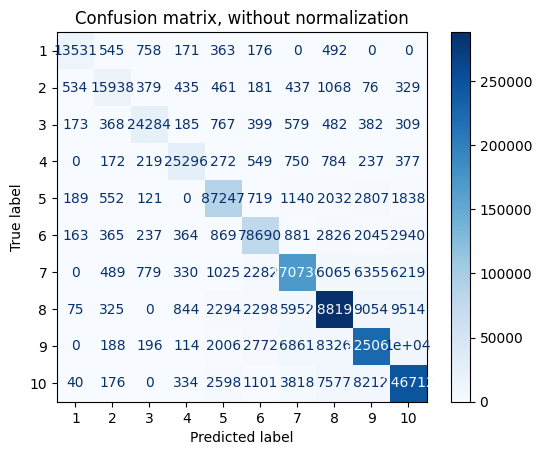

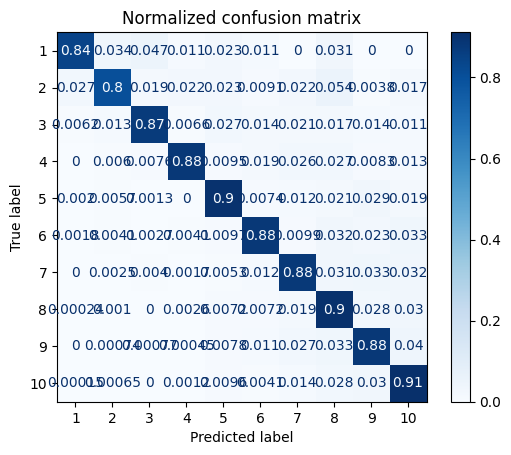

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [25]:
rfc.score(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    2.7s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    3.9s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    6.4s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    8.5s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   11.3s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   14.2s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:   17.7s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   20.8s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:   25.5s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   29.8s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   32.2s finished


0.8975944196703757

In [26]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
23,age,0.687751
1,normalized_year_of_publication,0.110741
0,isbn13,0.096622
65,state_other,0.007269
45,state_california,0.005206
...,...,...
13,publisher_harpercollins,0.000000
12,publisher_penguin_usa,0.000000
10,publisher_berkley_publishing_group,0.000000
8,publisher_simon_&amp;_schuster,0.000000


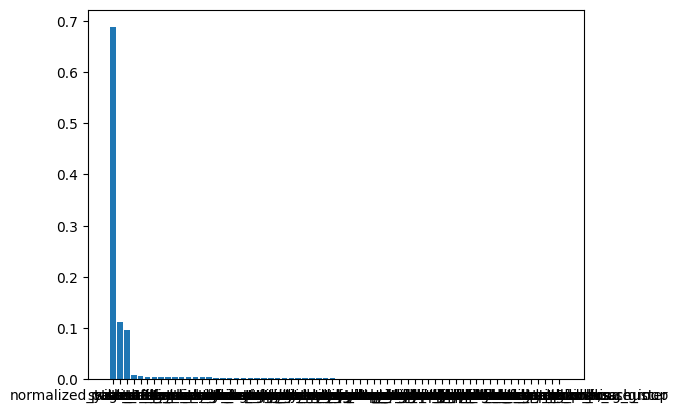

In [27]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [28]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex=True)]
country_importance

,Feature_names,Importances
24,country_usa,0.004032
44,country_other,0.003918
25,country_canada,0.002271
27,country_germany,0.001890
41,country_malaysia,0.001879
26,country_united_kingdom,0.001805
32,country_portugal,0.001587
29,country_australia,0.001489
28,country_spain,0.001387
34,country_netherlands,0.001149


In [29]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex=True)]
state_importance

,Feature_names,Importances
65,state_other,0.007269
45,state_california,0.005206
53,state_illinois,0.004038
50,state_new_york,0.003792
57,state_michigan,0.003738
60,state_massachusetts,0.003667
52,state_pennsylvania,0.003571
56,state_ohio,0.003339
54,state_washington,0.003312
63,state_north_carolina,0.003011


In [30]:
publisher_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^publisher", regex=True)]
publisher_importance

,Feature_names,Importances
7,publisher_scholastic,0.004009
22,publisher_other,0.002819
9,publisher_penguin_books,0.001304
11,publisher_warner_books,0.001192
5,publisher_ballantine_books,0.001143
18,publisher_st._martin's_press,0.000773
4,publisher_pocket,0.000508
6,publisher_bantam_books,0.000351
3,publisher_silhouette,0.000000
21,publisher_zebra_books,0.000000


In [31]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex=True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())
print("publisher_importance:", publisher_importance["Importances"].sum())

age: 23    0.687751
Name: Importances, dtype: float64
country_importance: 0.028515029740954663
state_importance: 0.06427109024552148
publisher_importance: 0.012099743817152146
